In [22]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# Read Dataset

In [23]:
# Load international online transactions data from CSV
tx_df = pd.read_csv('D:\KOMAL LEARNING\ELITE DATA SCIENCE\ML ORIGINAL\PROJECT 4\Project 4 Workbook Bundle\project_files\int_online_tx.csv')

In [24]:
tx_df.shape

(35116, 8)

In [25]:
tx_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [26]:
tx_df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [27]:
tx_df.Description.unique()

array(['ALARM CLOCK BAKELIKE PINK', 'ALARM CLOCK BAKELIKE RED ',
       'ALARM CLOCK BAKELIKE GREEN', ..., 'GOLD PHOTO FRAME',
       'PAPERWEIGHT HOME SWEET HOME', 'SET OF 6 RIBBONS PARTY'],
      dtype=object)

In [28]:
tx_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France


In [29]:
tx_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
35111,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
35112,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
35113,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
35114,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
35115,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [30]:
tx_df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

# II. Transaction-Level Data Cleaning

we are trying to cluster customers in order to provide more tailored service! That means transactions with missing 'CustomerID' are actually pointless to keep.

###### save a copy as a new object called clean_tx_df (that we'll continue to clean) since we're altering the dataframe.

In [31]:
# Only keep transactions with CustomerID's
clean_tx_df = tx_df[tx_df.CustomerID.notnull()].copy()

###### just for clarity, we'll convert the CustomerID's from floats into integers.

In [32]:
# Convert customer ID's into integers
clean_tx_df['CustomerID'] = clean_tx_df.CustomerID.astype(int)

# Display first 5 CustomerID's in the transaction dataset
clean_tx_df.CustomerID.head()

0    12583
1    12583
2    12583
3    12583
4    12583
Name: CustomerID, dtype: int32

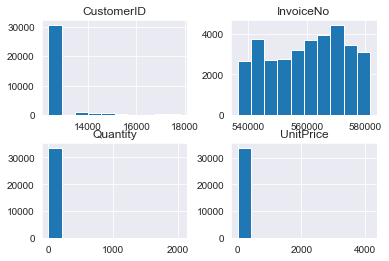

In [33]:
clean_tx_df.hist()
plt.show()

In [34]:
clean_tx_df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,33698.000000,33698.000000,33698.000000,33698.000000
mean,559921.120779,14.797110,4.480351,12793.819188
std,12718.848027,31.690705,47.179203,828.171434
min,536370.000000,1.000000,0.040000,12347.000000
25%,548374.500000,5.000000,1.250000,12473.000000
50%,561093.000000,10.000000,1.950000,12597.000000
75%,570672.000000,12.000000,3.750000,12708.000000
max,581587.000000,2040.000000,4161.060000,17844.000000


In [40]:
clean_tx_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Sales          0
dtype: int64

# III. Customer-Level Feature Engineering

###### Now that we have a cleaned transaction-level dataset, it's time to roll it up to the customer level

Instead of one transaction per row We want 1 customer per row, and we want the features to represent information such as:

>Number of unique purchases by the customer

>Average cart value for the customer

>Total sales for the customer
Etc.

In [36]:
# Create 'Sales' interaction feature
clean_tx_df['Sales'] = clean_tx_df.Quantity * clean_tx_df.UnitPrice

In [45]:
clean_tx_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583,France,40.8
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583,France,30.0
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583,France,53.1
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583,France,70.8
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583,France,46.8


###### Here are some questions to consider.- In the first 10 observations, how many different customers are there? 
- How many different invoices are there?
- Given answers to the first two questions, how many unique purchases are shown?
- Technically, aren't these observations actually line-items within each transaction?
- Do you expect the customer-level dataset to be much smaller?

##### Finally, display the distribution of transactions by country.

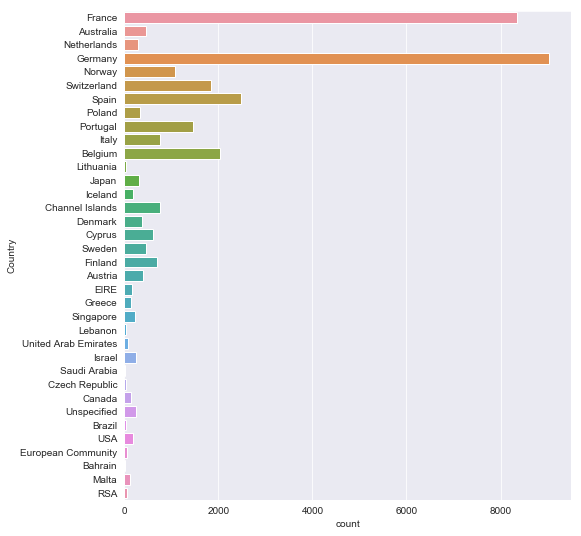

In [46]:
# Make figsize 8x9
plt.figure(figsize=(8,9))

# Bar plot by country
sns.countplot(y='Country', data=clean_tx_df)
plt.show()

Remember, this is at the transaction/line-item level.
The number of customers for each country is even smaller because each customer has multiple transactions!
Therefore, it's plain to see that clustering by country is not very efficient.

In [42]:
clean_tx_df.to_csv('D:\KOMAL LEARNING\ELITE DATA SCIENCE\ML ORIGINAL\PROJECT 4\Project 4 Workbook Bundle\project_files\My files\cleaned_transactions.csv', index=None)

##### 1. Aggregate Customer level data

>- the total number of unique transactions for each customer.

In [15]:
Invoice_data = clean_tx_df.groupby('CustomerID').InvoiceNo.agg(['nunique'])

In [16]:
Invoice_data.columns

Index(['nunique'], dtype='object')

we counted the number of unique Invoice ID's for each customer.
Many common aggregations can be referred to by a simple string, e.g. 'nunique', 'count', 'sum', 'mean', 'min', 'max'

In [18]:
Invoice_data.head()

,nunique
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


In [19]:
Invoice_data.columns = ['total_transactions']
Invoice_data.head()

,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


In [43]:
Invoice_data.total_transactions.mean()

3.710144927536232

##### 2. Aggregate product data

In [47]:
# Aggregate product data
product_data = clean_tx_df.groupby('CustomerID').StockCode.agg(['count','nunique'])
product_data.columns = ['total_products', 'total_unique_products']
product_data.head()

,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


>Confirm that all customers' 'total_unique_products' are less than or equal to their corresponding 'total_products'.

In [48]:
all(product_data.total_products >= product_data.total_unique_products)

True

##### 3. Aggregate sales data by customer.

In [49]:
# Roll up sales data
sales_data = clean_tx_df.groupby('CustomerID').Sales.agg( ['sum', 'mean'] )
sales_data.columns = ['total_sales', 'avg_product_value']

# Display sales data for first 5 customers
sales_data.head()

,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


##### 4. Aggregate cart-level (i.e. invoice-level)

In [38]:
# Aggregate cart-level data (i.e. invoice-level)
cart_data = clean_tx_df.groupby(['CustomerID' , 'InvoiceNo']).Sales.agg(['sum'])
cart_data.columns = ['cart_value']

# Reset index
cart_data.reset_index(inplace=True)

In [39]:
cart_data.head()

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


In [44]:
cart_data.cart_value.mean()

609.8249414062511

##### 5. Customer-Level Cart Data

> Now that we have cart-level cart data, all we need to do is roll up by CustomerID again to get customer-level cart data.

Engineer 3 featurs:
- 'avg_cart_value' - average cart value by customer.
- 'min_cart_value' - minimum cart value by customer.
- 'max_cart_value' - maximum cart value by customer.

In [50]:
agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg(['mean','min','max'])
agg_cart_data.columns = ['avg_cart_value','min_cart_value','max_cart_value']

# Display cart data for first 5 CUSTOMERS
agg_cart_data.head()

,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30


##### Join the various customer-level datasets together with the .join() function

In [52]:
# Join together customer-level ABT
customer_df = Invoice_data.join([product_data, sales_data, agg_cart_data])

customer_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [54]:
customer_df.to_csv('D:\\KOMAL LEARNING\\ELITE DATA SCIENCE\ML ORIGINAL\\PROJECT 4\\Project 4 Workbook Bundle\\project_files\\My files\\analytical_base_table.csv')